In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import linear_model, preprocessing
from sklearn.datasets import fetch_mldata

In [2]:
mnist = fetch_mldata("MNIST original")

In [3]:
Xdig = mnist.data
ydig = mnist.target
Xdigs = preprocessing.scale(Xdig)

C:\Users\nadjatee\Anaconda2\lib\site-packages\sklearn\utils\validation.py:429: DataConversionWarning: Data with input dtype uint8 was converted to float64 by the scale function.
  warnings.warn(msg, _DataConversionWarning)


In [4]:
def plt_digit(x):
    matrix = x.reshape((28,28))
    plt.imshow(matrix,  cmap='Greys_r')
    plt.xticks([])
    plt.yticks([])

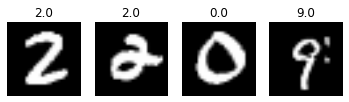

In [5]:
Iperm = np.random.permutation(Xdig.shape[0])
# Plot the images using the subplot command
for i in range(0,4):
    ind = Iperm[i]
    plt.subplot(1,4,i+1)
    plt.title(ydig[ind])
    plt_digit(Xdig[ind,:])

In [6]:
class ImgException(Exception):
    def __init__(self, msg='No msg'):
        self.msg = msg

In [7]:
import matplotlib.image as mpimg
import skimage.io
from skimage.filters import threshold_otsu
from skimage.segmentation import clear_border
from skimage.measure import label, regionprops
from skimage.morphology import closing, square
from skimage.color import label2rgb
from skimage.transform import resize
import matplotlib.patches as mpatches
from skimage import data
import skimage

In [8]:
import os.path

def leading_zero(x):
    return "0%i"%(x) if x>=10 else "00%i"%(x)

def load_img(char_ind, samp_ind):
    char_ind = leading_zero(char_ind)
    samp_ind = leading_zero(samp_ind)
    fname = "Img/Sample%s/img%s-%s.png"%(char_ind,char_ind,samp_ind)
    if not os.path.isfile(fname):
         raise ImgException("%s not found"%(fname))
    img = skimage.io.imread(fname)
    return img

Char = 47 samp=6
Img/Sample047/img047-070.png not found


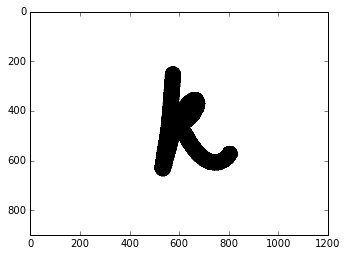

In [9]:
char_ind = 47
samp_inds = [6,70]
for samp_ind in samp_inds:
    try:
        img = load_img(char_ind=char_ind, samp_ind=samp_ind)
        print("Char = %d samp=%d" % (char_ind, samp_ind))
        plt.imshow(img)
    except ImgException as e:
        print(e.msg)

In [10]:
def mnist_resize(img):
    """
    Extracts a character from the image, and places in a 28x28 image to match the MNIST format.
    
    Returns:
    img1:  MNIST formatted 28 x 28 size image with the character from img
    box:   A bounding box indicating the locations where the character was found in img.    
    """
    # Image sizes (fixed for now).  To match the MNIST data, the image 
    # will be first resized to 20 x 20.  Then, the image will be placed in center of 28 x 28 box
    # offet by 4 on each side.
    nx_img = 20   
    ny_img = 20
    nx_box = 28   
    ny_box = 28
    offx = 4
    offy = 4
    
    # TODO:  Convert the image to gray scale using the skimage.color.rgb2gray method.
    bw = skimage.color.rgb2gray(img)
    
    # Threshold the image using OTSU threshold
    thresh = threshold_otsu(bw)
    bw = closing(bw < thresh, square(3)).astype(int)
    
    # Get the regions in the image.
    # This creates a list of regions in the image where the digit possibly is.
    regions = regionprops(bw)

    # TODO:  Find region with the largest area.  You can get the region area from region.area.
    area_max = 0
    region_max = None
    for region in regions:
        if region.area > area_max:
            region_max = region
            area_max = region.area
    
    # Raise an ImgException if no region with area >= 100 was found
    if (area_max < 100):
        raise ImgException("No image found")    
                
    # Get the bounding box of the character from region_max.bbox
    minr, minc, maxr, maxc = region_max.bbox
    box = [minr,minc,maxr,maxc]
    
    # TODO:  Crop the image in bw to the bounding box
    bw_crop = bw[minr:maxc,minc:maxc]
    # TODO:  Resize the cropped image to a 20x20 using the resize command.
    # You will need to use the mode = 'constant' option
    bw_resize = resize(bw_crop,(28,28),mode='constant')
    return bw_resize,box
    
    # TODO:  Threshold back to a 0-1 image by comparing the pixels to their mean value
    img1 = bw_resize/np.mean(bw_resize)
    # TODO:  Place extracted 20 x 20 image in larger image 28 x 28
    img1 = resize(img1,(28,28),mode='constant')
    return img1, box

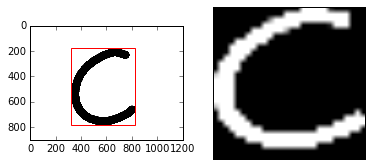

In [11]:
# Load an image
img = load_img(13,9)

try:
    img1, box = mnist_resize(img)
    # TODO:  Plot the original image, img, along with a red box around the captured character.
    # Use the mpatches.Rectangle and ax.add_patch methods to construct the rectangle.
    # TODO:  Plot the resized 28 x 28 image, img1.  You can use the plt_digit(img1) command 
    ax = plt.subplot(1,2,1)
    ax.imshow(img)
    ax.add_patch(mpatches.Rectangle((box[1], box[0]), box[3]-box[1],box[2]-box[0], fill=False, color='red'))
    image = plt.subplot(1,2,2)
    plt_digit(img1)
except ImgException as e:
    print(e.msg)

In [14]:
print img1

[[  2.32830644e-10   2.32830644e-10   2.32830644e-10   2.32830644e-10
    2.32830644e-10   2.32830644e-10   2.32830644e-10   2.32830644e-10
    2.32830644e-10   2.32830644e-10   2.32830644e-10   2.32830644e-10
    2.32830644e-10   2.32830644e-10   2.32830644e-10   2.32830644e-10
    2.32830644e-10   2.32830644e-10   2.32830644e-10   2.32830644e-10
    2.32830644e-10   6.98491931e-10   6.98491931e-10   6.98491931e-10
    6.98491931e-10   6.98491931e-10   4.18293318e-10   2.32830644e-10]
 [  2.32830644e-10   2.32830644e-10   2.32830644e-10   2.32830644e-10
    2.32830644e-10   2.32830644e-10   2.32830644e-10   2.32830644e-10
    2.32830644e-10   2.32830644e-10   2.32830644e-10   2.32830644e-10
    2.32830644e-10   2.32830644e-10   2.32830644e-10   2.32830644e-10
    2.32830644e-10   2.32830644e-10   2.32830644e-10   3.07669065e-10
    6.98491931e-10   6.98491931e-10   6.98491931e-10   6.98491931e-10
    6.98491931e-10   6.98491931e-10   6.98491931e-10   6.98491931e-10]
 [  2.32830644e-10

In [15]:
# Dimensions
nlet = 1000
nrow = 28
ncol = 28
npix = nrow*ncol
Xlet = np.zeros((nlet, npix))

i = 0
while i < nlet:
    # TODO:  Generate a random character and sample  
    numbers = range(37,45) + range(46,51) + range(52,63)
    char_ind = np.random.choice(numbers)
    samp_ind = np.random.randint(0,50)
  
    try:
        # TODO:  Load the image with load_img function
        img = load_img(char_ind,samp_ind)
        
        # TODO:  Reize the image with mnist_resize function
        img1, box = mnist_resize(img)
        
        # TODO:  Store the image in a row of Xlet[i,:] and increment i
        Xlet[i,:] = img1.reshape((784))
        i += 1
        
        # Print progress
        if (i % 50 == 0):
            print ('images captured = {0:d}'.format(i))
    except ImgException:
        # Skip if image loading or resizing failed
        pass

images captured = 50
images captured = 100
images captured = 150
images captured = 200
images captured = 250
images captured = 300
images captured = 350
images captured = 400
images captured = 450
images captured = 500
images captured = 550
images captured = 600
images captured = 650
images captured = 700
images captured = 750
images captured = 800
images captured = 850
images captured = 900
images captured = 950
images captured = 1000


In [ ]:
import pickle

with open( "Xlet.p", "wb" ) as fp:
    pickle.dump( Xlet, fp)

In [ ]:
with open( "Xlet.p", "rb" ) as fp:
    Xlet = pickle.load(fp)

In [16]:
dig_perm = np.random.permutation(Xdig.shape[0])
Xlets = 2*Xlet-1
X = np.vstack((Xdig[dig_perm[0:5000]],Xlet))
X = X/255.0*2 - 1
y = np.append(ydig[dig_perm[0:5000]],np.full((1000,1),10))

C:\Users\nadjatee\Anaconda2\lib\site-packages\numpy\core\numeric.py:301: FutureWarning: in the future, full((1000, 1), 10) will return an array of dtype('int32')
  format(shape, fill_value, array(fill_value).dtype), FutureWarning)


In [17]:
from sklearn import svm
svc = svm.SVC(kernel="rbf", C=2.8, gamma=.0073)

In [18]:
Iperm = np.random.permutation(X.shape[0])
ntr = 5000
nts = 1000
Xtr = X[Iperm[:ntr],:]
ytr = y[Iperm[:ntr]]
Xts = X[Iperm[ntr:ntr+nts],:]
yts = y[Iperm[ntr:ntr+nts]]

In [19]:
svc.fit(Xtr,ytr)

SVC(C=2.8, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.0073, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

[ 0.]


C:\Users\nadjatee\Anaconda2\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


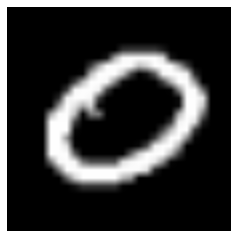

In [21]:
print svc.predict(Xts[333])
plt_digit(Xts[333])

In [ ]:
yhat = svc.predict(Xts)
acc = np.mean(yhat == yts)
print('Accuracy = {0:f}'.format(acc))

In [ ]:
from sklearn.metrics import confusion_matrix
C = confusion_matrix(yts,yhat)

# Normalize the confusion matrix
Csum = np.sum(C,1)
C = C / Csum[None,:]

# Print the confusion matrix
print(np.array_str(C, precision=3, suppress_small=True))

In [ ]:
Ierr = np.where((yts != 10) & (yhat == 10))[0]
nplt = 4
try:
    plt.figure(figsize=(10, 4))
    for i in range(nplt):        
        plt.subplot(1,nplt,i+1)        
        ind = Ierr[i]    
        plt_digit(Xts[ind,:])        
        title = 'true={0:d} est={1:d}'.format(yts[ind].astype(int), yhat[ind].astype(int))
        plt.title(title)
except:
    print "No error found"

In [ ]:
Ierr = np.where((yts == 10) & (yhat != 10))[0]
nplt = 4
try:
    plt.figure(figsize=(10, 4))
    for i in range(nplt):        
        plt.subplot(1,nplt,i+1)        
        ind = Ierr[i]    
        plt_digit(Xts[ind,:])        
        title = 'true={0:d} est={1:d}'.format(yts[ind].astype(int), yhat[ind].astype(int))
        plt.title(title)
except:
    print "No error found"

In [ ]:
Ierr = np.where((yts < 10) & (yhat < 10) & (yts != yhat))[0]
nplt = 4
try:
    plt.figure(figsize=(10, 4))
    for i in range(nplt):        
        plt.subplot(1,nplt,i+1)        
        ind = Ierr[i]    
        plt_digit(Xts[ind,:])        
        title = 'true={0:d} est={1:d}'.format(yts[ind].astype(int), yhat[ind].astype(int))
        plt.title(title)
except:
    print "No error found"